Secara teori: dengan kontanta C (amplitudo) bernilai 5

In [11]:
import numpy as np
import matplotlib.pyplot as plt

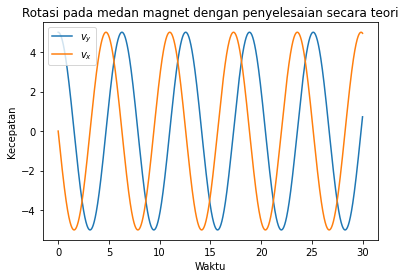

In [35]:
t=np.arange(0, 30, 0.01)

plt.figure()
plt.plot(t, 5*np.cos(t), t, -5*np.sin(t))
plt.title('Rotasi pada medan magnet dengan penyelesaian secara teori')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

Secara numerik: dengan q=1, B_z=3, m=3

In [64]:
def run_kut4(f, x, y, h):
    k0 = h*f(x, y)
    k1 = h*f(x+h/2, y+k0/2)
    k2 = h*f(x+h/2, y+k1/2)
    k3 = h*f(x+h, y+k2)
    return (k0 + 2*k1 + 2*k2 + k3)/6

#Definisi persamaan diferensial terkopel
def vx_dot(t,vx,vy,q=1, Bz=3, m=3):
    return -q*Bz*vy/m

def vy_dot(t,vy,vx,q=1, Bz=3, m=3):
    return q*Bz*vx/m

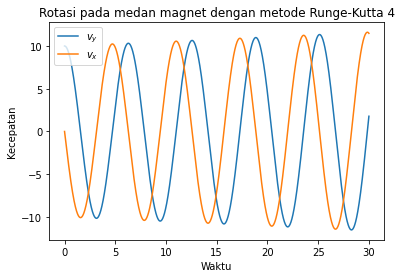

In [65]:
#Kondisi awal
vx_awal = 0 #kecepatan tangensial dari rotasi
vy_awal = 10 
t_awal = 0
t_stop = 30
h = 0.01

vxs=[vx_awal]
vys=[vy_awal]
ts=[t_awal]

#Iterasi metode runge-kutta
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rk4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rk4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

#plot kecepatan pada arah x dan y tiap waktu
plt.figure()
plt.plot(ts,vys,ts,vxs)
plt.title('Rotasi pada medan magnet dengan metode Runge-Kutta 4')
plt.xlabel('Waktu')
plt.ylabel('Kecepatan')
plt.legend(['$v_y$', '$v_x$'])

plt.show()